In [128]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
image = cv2.imread("/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet")
#cv2.imshow("Window Name", image)
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight

In [2]:
# The dataset is contained in this directory
file_path = '/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/'

In [3]:
# Benign file path
benign_cases = os.listdir('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/Benign')
# Top 5 files
print(benign_cases[0:5])
# Bottom 5 files
print(benign_cases[-5:])

['SOB_B_F-14-25197-400-039.png', 'SOB_B_PT-14-21998AB-400-036.png', 'SOB_B_F-14-23222AB-400-001.png', 'SOB_B_F-14-23222AB-400-015.png', 'SOB_B_PT-14-21998AB-400-022.png']
['SOB_B_PT-14-29315EF-400-015.png', 'SOB_B_F-14-23222AB-400-018.png', 'SOB_B_F-14-25197-400-034.png', 'SOB_B_PT-14-21998AB-400-007.png', 'SOB_B_PT-14-21998AB-400-013.png']


In [4]:
# Malignant file path
malignant_cases = os.listdir('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/Malignant')
# Top 5 files
print(malignant_cases[0:5])
# Bottom 5 files
print(malignant_cases[-5:])

['SOB_M_DC-14-13993-400-017.png', 'SOB_M_DC-14-13993-400-003.png', 'SOB_M_DC-14-5694-400-016.png', 'SOB_M_DC-14-11951-400-018.png', 'SOB_M_DC-14-16188-400-007.png']
['SOB_M_DC-14-11951-400-015.png', 'SOB_M_DC-14-15792-400-001.png', 'SOB_M_DC-14-15792-400-015.png', 'SOB_M_DC-14-11951-400-001.png', 'SOB_M_DC-14-13993-400-032.png']


In [5]:
# Number of files in each category
print('Number of benign_cases:', len(benign_cases))
print('Number of malignant_cases:', len(malignant_cases))

Number of benign_cases: 386
Number of malignant_cases: 422


# Creating Labels for the Categories

In [7]:
# Create the labels

benign_labels = [1]*386

malignant_labels = [0]*422

In [8]:
# Top 5 and bottom 5 labels
print(benign_labels[0:5])
print(malignant_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
# Total number of labels contained in each category
print(len(benign_labels))
print(len(malignant_labels))

386
422


In [10]:
# Merge labels in both categories
labels = benign_labels + malignant_labels
# Top 5 labels and Bottom 5 labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the Images

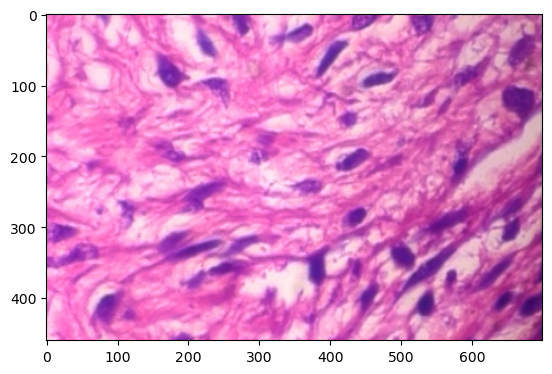

In [12]:
# Displaying benign image
img = mpimg.imread('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/Benign/SOB_B_F-14-25197-400-039.png')
imgplot = plt.imshow(img)
plt.show()

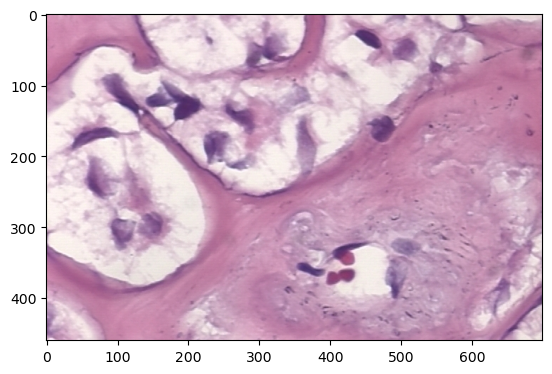

In [13]:
# Displaying malignant image
img = mpimg.imread('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/malignant/SOB_M_DC-14-13993-400-017.png')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

In [15]:
benign_path = '/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/Benign/'

data = []

for img_file in benign_cases:
    image = Image.open(benign_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


malignant_path = '/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Train/malignant/'

for img_file in malignant_cases:
    image = Image.open(malignant_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [16]:
len(data)

808

In [17]:
data[0]

array([[[250, 130, 196],
        [248, 117, 204],
        [238, 110, 194],
        ...,
        [190,  94, 159],
        [181,  81, 145],
        [178,  90, 149]],

       [[252, 135, 201],
        [245, 111, 202],
        [239, 106, 195],
        ...,
        [175,  82, 144],
        [177,  79, 141],
        [193, 109, 164]],

       [[255, 155, 217],
        [246, 120, 206],
        [240, 107, 197],
        ...,
        [183,  93, 144],
        [188,  92, 149],
        [192, 110, 167]],

       ...,

       [[254, 196, 229],
        [249, 159, 221],
        [237, 122, 201],
        ...,
        [167,  66, 135],
        [132,  39, 122],
        [ 93,  21, 102]],

       [[255, 195, 226],
        [250, 168, 220],
        [250, 150, 220],
        ...,
        [152,  50, 130],
        [118,  27, 113],
        [ 99,  21, 102]],

       [[254, 203, 228],
        [255, 203, 243],
        [255, 187, 248],
        ...,
        [134,  33, 118],
        [117,  21, 108],
        [109,  22, 104]]

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
# converting image list and label list to numpy arrays

x_train = np.array(data)
y_train = np.array(labels)

In [20]:
type(x_train)

numpy.ndarray

In [21]:
type(y_train)

numpy.ndarray

In [22]:
print(x_train.shape)
print(y_train.shape)

(808, 128, 128, 3)
(808,)


In [23]:
# Scaling the data
x_train_scaled = x_train/255.0

In [24]:
x_train_scaled[0]

array([[[0.98039216, 0.50980392, 0.76862745],
        [0.97254902, 0.45882353, 0.8       ],
        [0.93333333, 0.43137255, 0.76078431],
        ...,
        [0.74509804, 0.36862745, 0.62352941],
        [0.70980392, 0.31764706, 0.56862745],
        [0.69803922, 0.35294118, 0.58431373]],

       [[0.98823529, 0.52941176, 0.78823529],
        [0.96078431, 0.43529412, 0.79215686],
        [0.9372549 , 0.41568627, 0.76470588],
        ...,
        [0.68627451, 0.32156863, 0.56470588],
        [0.69411765, 0.30980392, 0.55294118],
        [0.75686275, 0.42745098, 0.64313725]],

       [[1.        , 0.60784314, 0.85098039],
        [0.96470588, 0.47058824, 0.80784314],
        [0.94117647, 0.41960784, 0.77254902],
        ...,
        [0.71764706, 0.36470588, 0.56470588],
        [0.7372549 , 0.36078431, 0.58431373],
        [0.75294118, 0.43137255, 0.65490196]],

       ...,

       [[0.99607843, 0.76862745, 0.89803922],
        [0.97647059, 0.62352941, 0.86666667],
        [0.92941176, 0

# Loading and Preparing Validation Data

In [26]:
# List all files in the Benign validation dataset directory.
benign_files = os.listdir('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Valid/Benign/')
# Print the first 5 and last 5 filenames to inspect the dataset content.
print(benign_files[:5])      # Display the first 5 filenames.
print(benign_files[-5:])     # Display the bottom 5 filenames.

['SOB_B_F-14-9133-400-010.png', 'SOB_B_F-14-9133-400-004.png', 'SOB_B_F-14-14134E-400-008.png', 'SOB_B_F-14-9133-400-005.png', 'SOB_B_F-14-9133-400-011.png']
['SOB_B_F-14-14134E-400-005.png', 'SOB_B_F-14-9133-400-021.png', 'SOB_B_F-14-9133-400-009.png', 'SOB_B_A-14-29960CD-400-016.png', 'SOB_B_A-14-29960CD-400-002.png']


In [27]:
# List all files in the Malignant validation dataset directory.
malignant_files = os.listdir('/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Valid/Malignant/')
# Print the first 5 and last 5 filenames to inspect the dataset content.
print(malignant_files[:5])     # Display the first 5 filenames.
print(malignant_files[-5:])    # Display the bottom 5 filenames.

['SOB_M_DC-14-5694-400-002.png', 'SOB_M_DC-14-10926-400-004.png', 'SOB_M_DC-14-2980-400-011.png', 'SOB_M_DC-14-10926-400-005.png', 'SOB_M_DC-14-2985-400-001.png']
['SOB_M_DC-14-4372-400-020.png', 'SOB_M_DC-14-9461-400-034.png', 'SOB_M_DC-14-9461-400-021.png', 'SOB_M_DC-14-9461-400-035.png', 'SOB_M_DC-14-4372-400-021.png']


In [28]:
# Print the number of validation cases for both benign and malignant classes.
print("Number of Val. Benign Cases: ", len(benign_files))
print("Number of Val. Malignant Cases: ", len(malignant_files))

Number of Val. Benign Cases:  97
Number of Val. Malignant Cases:  92


In [29]:
# Create the labels

benign_val_labels = [1]*97

malignant_val_labels = [0]*92

In [30]:
print(benign_val_labels [:5])        # Print the first 5 labels of benign validation cases.
print(malignant_val_labels [:5])     # Print the first 5 labels of malignant validation cases.

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [31]:
# Print the total number of labels for both benign and malignant validation datasets to ensure they match the number of samples.
print(len(benign_val_labels))
print(len(malignant_val_labels)) 

97
92


In [32]:
# Combine the labels of benign and malignant validation datasets into one list.
val_label = benign_val_labels + malignant_val_labels
print(val_label[:5])        # Display the first 5 labels of the combined validation dataset.
print(val_label[-5:])       # Display the last 5 labels of the combined validation dataset.

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [33]:
# Load and preprocess the validation images for both benign and malignant categories.
# Images are resized to 128x128 pixels, converted to RGB, and converted into numpy arrays for further processing.
benign_val_path = '/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/valid/Benign/'

val_data = []

# Process and append benign validation images

for img_file in benign_files:
    image = Image.open(benign_val_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    val_data.append(image)


malignant_val_path = '/Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/valid/malignant/'

# Process and append malignant validation images

for img_file in malignant_files:
    image = Image.open(malignant_val_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    val_data.append(image)

In [34]:
# Converting image list and label list to numpy arrays

x_val = np.array(val_data)
y_val = np.array(val_label)

# Scaling the validation data
x_val_scaled = x_val / 255.0

In [35]:
type(x_val)

numpy.ndarray

In [36]:
type(y_val)

numpy.ndarray

In [37]:
print(x_val.shape) # Display the shape of the validation feature data (images).
print(y_val.shape) # Display the shape of the validation labels.

(189, 128, 128, 3)
(189,)


In [38]:
print("Length of val_data:", len(val_data))      # Display the number of images in the validation dataset.
print("Length of val_labels:", len(val_label))   # Display the number of labels in the validation dataset.

Length of val_data: 189
Length of val_labels: 189


In [39]:
x_val_scaled.shape

(189, 128, 128, 3)

In [40]:
y_val.shape

(189,)

# Convolutional Neural Network (CNN)

In [154]:
# Define a Convolutional Neural Network (CNN) model using Keras Sequential API for binary classification.
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])
# Print the model summary to see the structure, parameters, and output shapes of the model.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,465 (509.63 KB)

 Trainable params: 130,465 (509.63 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Check data shapes
print("x_train_scaled shape:", x_train_scaled.shape)
print("y_train shape:", y_train.shape)

# Compile the model by specifying the optimizer, loss function, and evaluation metrics.
model.compile(
    optimizer="adam",                   
    loss="binary_crossentropy",        
    metrics=["accuracy"]
)  

# Define learning rate scheduler and early stopping criteria to improve training efficiency.
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Train the model
history = model.fit(
    x_train_scaled,  # Feature data
    y_train,         # Labels
    validation_data=(x_val_scaled, y_val),
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
    
)
# Output the training history
print("Training complete.")

x_train_scaled shape: (808, 128, 128, 3)
y_train shape: (808,)
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 370ms/step - accuracy: 0.4886 - loss: 0.6971 - val_accuracy: 0.4868 - val_loss: 0.6558
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.6540 - loss: 0.6154 - val_accuracy: 0.7619 - val_loss: 0.4828
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.7884 - loss: 0.5072 - val_accuracy: 0.8307 - val_loss: 0.3849
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.7944 - loss: 0.4656 - val_accuracy: 0.9471 - val_loss: 0.3140
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.7947 - loss: 0.4576 - val_accuracy: 0.8571 - val_loss: 0.3054
Training complete.


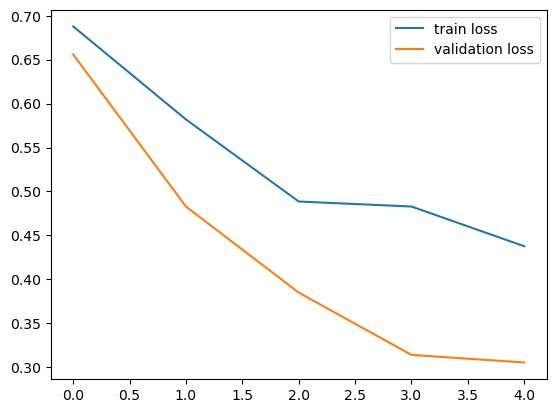

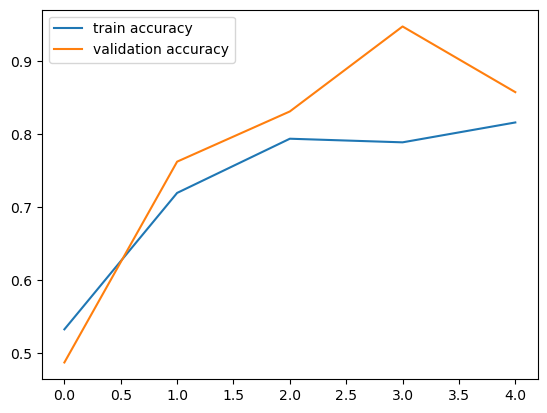

In [157]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted:  /Users/Brytechef/Desktop/AI Engineer Training Program/Breast Cancer DataSet/Test/Malignant/SOB_M_DC-14-12312-400-019.png


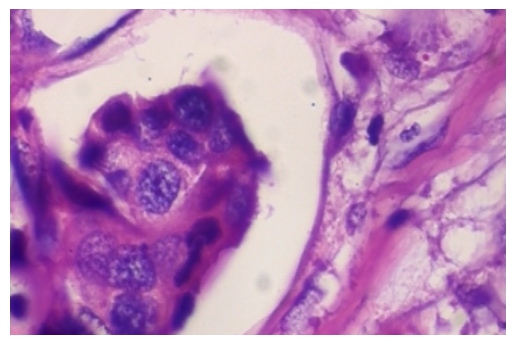

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction probabilities: [[0.0061001]]
Predicted Label: 0
Malignant Case


In [136]:
# Input image path
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Check if the image was loaded correctly
if input_image is None:
    print("Error: Could not read the image. Check the file path.")
else:
    # Convert BGR to RGB for correct display with matplotlib
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.show()

    # Preprocess the image
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Model prediction
    input_prediction = model.predict(input_image_reshaped)
    print("Prediction probabilities:", input_prediction)

    # Determine the predicted class
    input_pred_label = np.argmax(input_prediction)
    print("Predicted Label:", input_pred_label)

    # Interpret the result
    if input_pred_label == 1:
        print('Benign Case')
    else:
        print('Malignant Case')